In [1]:
import sys
sys.path.append("../../src")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

## Load and preprocess data

In [4]:
import data

In [21]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("materials_id", "item_id", "condition_id"))

response_df = raw_df[raw_df.trial_type == "html-slider-response-with-copout"]

Missing datastring for uid debug9X7NKD:debugKJBC0S. Status was 1.
Missing datastring for uid debugCIT0JY:debugOEXFJU. Status was 1.
Missing datastring for uid debug49IEJI:debugSVU9KB. Status was 1.
Missing datastring for uid debug49IEJK:debugSVU9KB. Status was 1.
Missing datastring for uid debug49IEJL:debugSVU9KB. Status was 1.
Missing datastring for uid debug49IEJM:debugSVU9KB. Status was 1.
Missing datastring for uid debug49IEJO:debugSVU9KB. Status was 1.
Missing datastring for uid debug49IEJFP:debugSVU9KB. Status was 1.
Missing datastring for uid debug49IEJFQ:debugSVU9KB. Status was 1.
Missing datastring for uid debug49IEJFR:debugSVU9KB. Status was 1.
Missing datastring for uid debug49IEJFS:debugSVU9KB. Status was 1.
Missing datastring for uid debug49IEJFW:debugSVU9KB. Status was 1.
Missing datastring for uid debug6RHBXZ:debugBWV8YP. Status was 1.
Missing datastring for uid debug6RHBXA:debugBWV8YP. Status was 1.


In [22]:
# DEV just use last subject
response_df = response_df.xs("debugV7NH7A:debugTOAZGF", level="uniqueid", drop_level=False)

In [24]:
# Expand condition data
response_df = pd.concat([response_df,
                         response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                        axis=1) \
    .drop(columns="condition_id")

In [25]:
# Convert condition_id to independent features
response_df["agent_is_topic"] = response_df["condition_0"] == 0
response_df["agent_is_subject"] = response_df["condition_1"] == 0

In [26]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.min()) / (xs.max() - xs.min()))

In [27]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,materials_id,item_id,survey_question_idx,survey_answer,slider_value,slider_copout,condition_0,condition_1,condition_2,agent_is_topic,agent_is_subject,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,
1,debugV7NH7A:debugTOAZGF,0,0,debugTOAZGF,debugV7NH7A,debugZBJLGS,html-slider-response-with-copout,3381.9,0.0-1.0,None,NaN,<NA>,NaN,94.0,False,practice,solid,full,False,False,0.94
2,debugV7NH7A:debugTOAZGF,0,0,debugTOAZGF,debugV7NH7A,debugZBJLGS,html-slider-response-with-copout,3157.8,0.0-2.0,None,NaN,<NA>,NaN,97.0,False,practice,liquid,full,False,False,0.97
3,debugV7NH7A:debugTOAZGF,0,0,debugTOAZGF,debugV7NH7A,debugZBJLGS,html-slider-response-with-copout,2873.7,0.0-3.0,None,NaN,<NA>,NaN,4.0,False,practice,abstract,empty,False,False,0.04
4,debugV7NH7A:debugTOAZGF,0,0,debugTOAZGF,debugV7NH7A,debugZBJLGS,html-slider-response-with-copout,2582.9,0.0-4.0,None,NaN,<NA>,NaN,5.0,False,practice,solid,empty,False,False,0.05
5,debugV7NH7A:debugTOAZGF,0,0,debugTOAZGF,debugV7NH7A,debugZBJLGS,html-slider-response-with-copout,2190.3,0.0-5.0,None,NaN,<NA>,NaN,96.0,False,practice,abstract,full,False,False,0.96


In [28]:
response_df.to_csv("responses.csv")

## Attention checks

### Practice round

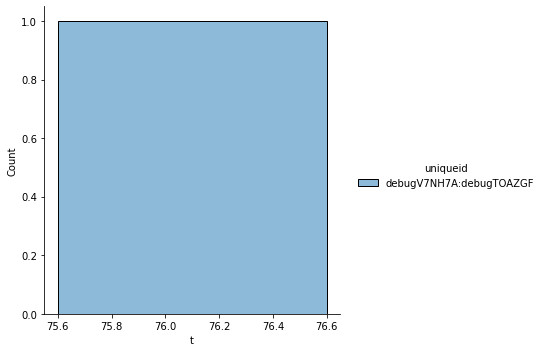

In [35]:
from scipy.stats import ttest_ind
def compute_practice_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" practice items
    """
    practice_rows = subj_rows[subj_rows.condition_0 == "practice"]
    full_practice = practice_rows[practice_rows.condition_2 == "full"]
    empty_practice = practice_rows[practice_rows.condition_2 == "empty"]
    
    return pd.Series(ttest_ind(full_practice.slider_value, empty_practice.slider_value),
                     index=["t", "pval"])

practice_stats = response_df.groupby("uniqueid").apply(compute_practice_ttest)
sns.displot(practice_stats.reset_index(), x="t", hue="uniqueid")

### Fillers

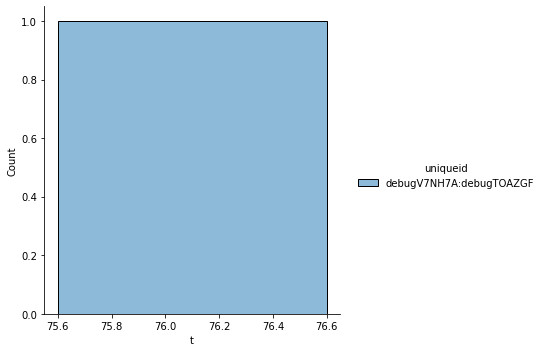

In [38]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" filler items
    """
    practice_rows = subj_rows[subj_rows.condition_0 == "filler"]
    full_practice = practice_rows[practice_rows.condition_1 == "full"]
    empty_practice = practice_rows[practice_rows.condition_1 == "empty"]
    
    return pd.Series(ttest_ind(full_practice.slider_value, empty_practice.slider_value),
                     index=["t", "pval"])

practice_stats = response_df.groupby("uniqueid").apply(compute_practice_ttest)
sns.displot(practice_stats.reset_index(), x="t", hue="uniqueid")

## Basic visualization

In [41]:
exp_items = response_df[~(response_df.condition_0.isin(("practice", "filler")))]

In [42]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = exp_items.groupby(["item_id"]).apply(compute_item_difference)

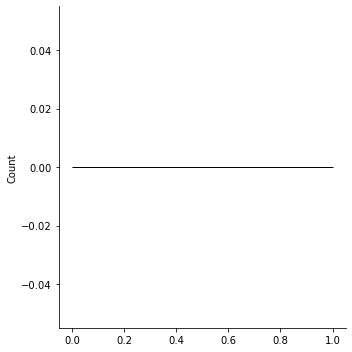

In [43]:
sns.displot(item_differences)